<a href="https://colab.research.google.com/github/Ufoan/Taller_curso_inf_cuantica_525405/blob/main/Lab_practico_intro_qiskit_clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría de la Información Cuántica: Comunicación y Computación (525405) 2025-1 <br>
#**Taller Introducción qiskit**: Clase 1.

# Instalar e importar paquetes necesarios

In [14]:
!pip install numpy matplotlib qiskit qiskit_aer qiskit_experiments pylatexenc

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer.primitives import Sampler

# Parte I: ¿Qué es Qiskit?

**Qiskit** es un framework de código abierto desarrollado por IBM para el diseño, simulación y ejecución de algoritmos cuánticos. Está escrito en Python y permite trabajar con:


*   Circuitos cuánticos.
*   Simulaciones locales.
* Ejecuciones en computadores cuánticos reales a través de la nube ([IBM quantum platform](https://quantum.ibm.com)).








## ¿Por qué usar Qiskit?

* Es uno de los frameworks mas completos y más utilizado.
* Permite simular y visualizar circuitos de manera intuitiva. (En IBM quantum platform, existe el [**composer**](https://quantum.ibm.com/composer) que permite crear circuitos arrastrando puertas, literalmente).
* Tiene acceso directo a hardware cuántico real.
* Es modular: Puedes trabajar sólo con las partes que necesitas.

## ¿Cuál es la arquitectura de Qiskit?


Qiskit está dividido en varios módulos principales, entre ellos se encuentran:
* ``qiskit-terra``: que corresponde al *core*. Define el circuito cuántico, las puertas, los registros cuánticos y clásicos, además de permitir construir, transformar y optimizar circuitos.
* ``qiskit-aer``: Que corresponde a la parte de *simulación*. Permite simular circuitos de manera local, es decir, sin necesidad de hardware cuántico real.
* ``qiskit-ibmq-provider``: Permite conectarse a **IBM Cloud** (ex IBM quantum platform), lo que permite ejecutar circuitos en computadores cuánticas reales. Con una cuenta gratuita se tiene un aproximado de 10 minutos de simulaciones al mes.

**Ejemplo**: En el siguiente bloque de código se crea un circuito cuántico que crea un estado en superposición (``qiskit-terra``). Luego se simula con ``sampler`` (``qiskit-aer``) y finalmente se visualizan los resultados en el histograma:

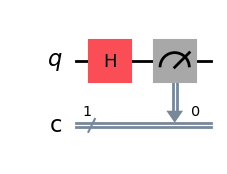

In [22]:
#Importamos los paquetes
from qiskit import QuantumCircuit #Lo necesitamos para crea el circuito cuántico vacío
from qiskit_aer.primitives import Sampler #El simulador
from qiskit.visualization import plot_histogram #Para la visualización

qc = QuantumCircuit(1, 1) #Crea el circuito cuántico vacío
qc.h(0) #Aplicamos la puerta de hadamard al qubit 0
qc.measure(0, 0) #Meidmos en el qubit 0 y guardamos el resultado en el bit clásico 0 (c)
qc.draw('mpl') #Dibuja el circuito

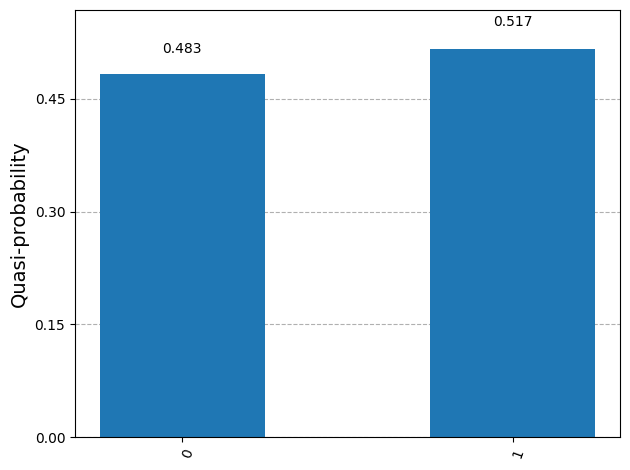

In [23]:
sampler = Sampler() #llamamos al simulador
job = sampler.run(qc, shots=1024) #La cantidad de shots es la cantidad que se repite el experimento
result = job.result() #Se obtienen los resultados del experimento
counts = result.quasi_dists #Nos entrega la "quasi" distribución de probabilidad

plot_histogram(counts)

# Parte 2: Primeros Pasos

## ¿Qué se necesita para crear un circuito cuántico?

Para crear un circuito cuántico necesitamos:


1.   **Qubits**: Unidades de información cuántica.
2.   **Bits clásicos**: Donde almacenaremos los resultados de las mediciones.
3. **Un circuito cuántico**: La estructura que conecta todo.

Creemos nuestro primer circuito cuántico:

### 1. Importamos el módulo ``QuantumCircuit``

In [24]:
from qiskit import QuantumCircuit

### 2. Creamos el circuito

Hay más de una manera de crear el circuito cuántico, nos enfocaremos en la manera más sencilla.

Para crear un circuito cuántico llamado $\text{qc}$ con $n$ qubits y $m$ bits clásicos, escribiremos ``qc = QuantumCircuit(n,m)``. Notemos que la cantidad de qubits y bits clásicos a utilizar dependerán de lo que se quiera simular o trabajar.

**Ejercicio 1**: Cree un circuito cuántico llamado **qc** con un qubit y un bit clásico. Puede visualizar el circuito utilizando el comando ``qc.draw('mpl')``.

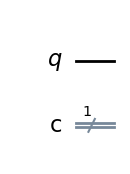

In [26]:
qc = QuantumCircuit(1,1)
qc.draw('mpl')

### 3. Agregamos compuertas

A pesar que en qiskit existen puertas que se pueden aplicar a tres o más qubits, nos centraremos en las que son de 1 o 2.

* **Puertas de 1 qubit**: Para agregar estas puertas se escribe ``qc.nombrepuerta(n)`` donde $n$ es el qubit al cuál le estamos aplicando la puerta.
* **Puertas de 2 qubits** : En caso de los control-puerta, se escribe ``qc.controlpuerta(c,t)`` donde **c** representa al qubit de control y **t** al target.

Las puertas más utilizadas son:

### Puertas de 1 qubit

| Nombre     | Símbolo          | Matriz                                                 | En Qiskit                          | Descripción                                |
|------------|------------------|--------------------------------------------------------|------------------------------------|--------------------------------------------|
| Pauli-X    | `X`              | $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $        | `qc.x(0)`                          | Puerta NOT cuántica                        |
| Pauli-Y    | `Y`              | $ \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} $       | `qc.y(0)`                          | Rotación con fase compleja                 |
| Pauli-Z    | `Z`              | $ \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $       | `qc.z(0)`                          | Invierte fase de $|1\rangle$               |
| Hadamard   | `H`              | $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ | `qc.h(0)`                | Superposición                              |
| Phase      | `S`              | $ \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} $        | `qc.s(0)`                          | Fase de $ \pi/2 $                          |
| T (pi/8)   | `T`              | $ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} $ | `qc.t(0)`                      | Fase de $ \pi/4 $                          |
| $R_x$      | `rx(θ)`          | $ \begin{bmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{bmatrix} $ | `qc.rx(theta, 0)` | Rotación en eje X |
| $R_y$      | `ry(θ)`          | $ \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix} $   | `qc.ry(theta, 0)` | Rotación en eje Y |
| $R_z$      | `rz(θ)`          | $ \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{bmatrix} $ | `qc.rz(theta, 0)`     | Rotación en eje Z (fase)                   |

Notemos que **TODAS ESTÁN APLICADAS AL QUBIT 0**. Los índices en qiskit comienzan del cero.

En caso que no funcione la tabla, poner imagen:
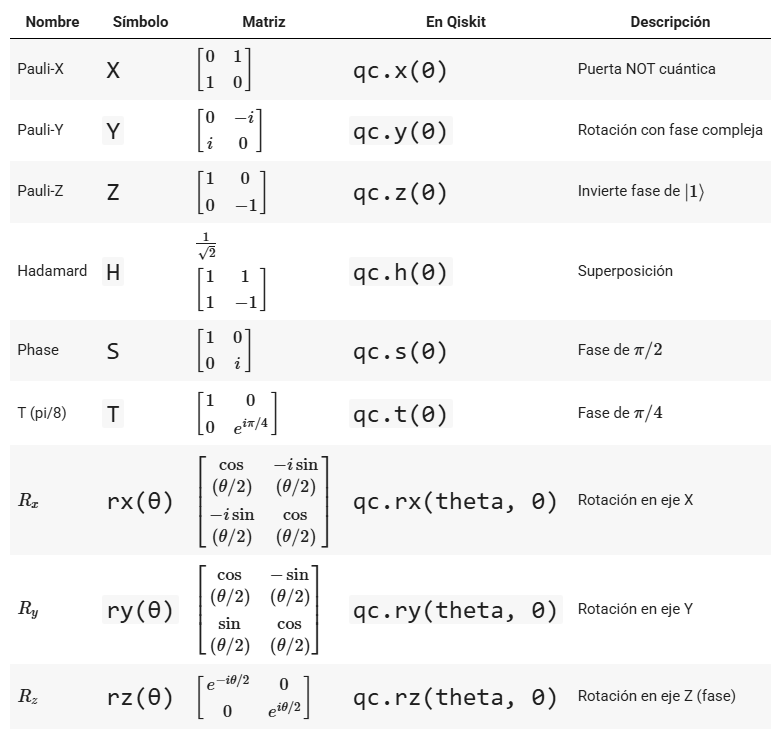

# Parte 3: Simulación y visualización

# Parte 4: Creando un estado de Bell

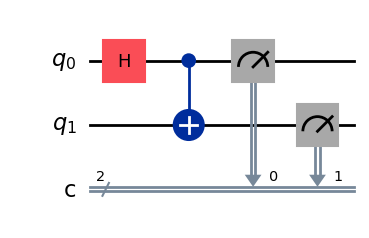

In [50]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.cx(0,1)
qc2.measure([0,1],[0,1])
qc2.draw('mpl')

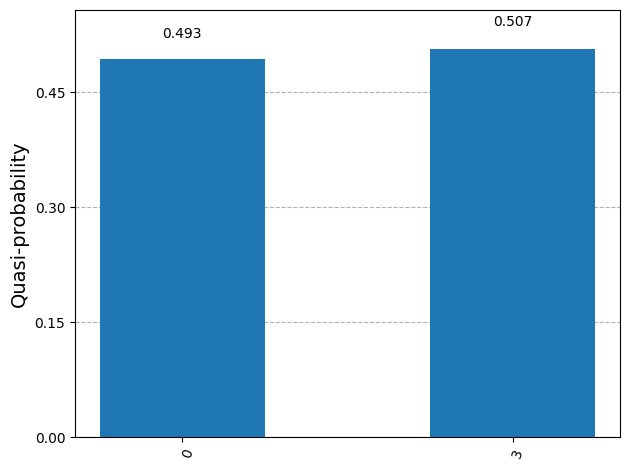

In [51]:
sampler = Sampler()
job = sampler.run(qc2, shots=1024)
result = job.result()
counts = result.quasi_dists

plot_histogram(counts)

# Referencias



1.   Taller 1: Introducción qiskit, ECC 2025 MIRO. Constanza Vargas, Barbara Candia, Luciano Pereira. <Agregar link maybe>
2.  [Qiskit 101 & 102](https://learning.quantum.ibm.com/course/qiskit-101-and-102).
3. [Get started: Hello world](https://docs.quantum.ibm.com/guides/hello-world)



# Contacto

María Paz Barría <br>
Estudiante Doctorado en Ciencias Físicas <br>
Universidad de Concepción<br>
marbarria@udec.cl